# SỔ TAY KAGGLE: HƯỚNG DẪN SỬ DỤNG GEMMA LLM TRONG TRIỂN KHAI MÔ HÌNH SVM VỚI DỮ LIỆU IRIS

# Giới thiệu
Trong dự án này, chúng ta sẽ tìm hiểu cách triển khai mô hình phân loại SVM (Support Vector Machine) bằng thư viện Scikit-learn với bộ dữ liệu Iris nổi tiếng.
SVM là một trong những thuật toán học có giám sát mạnh mẽ, được dùng phổ biến trong các bài toán phân loại và nhận dạng mẫu.

Điểm đặc biệt của dự án này là việc tích hợp Gemma LLM vào quy trình phát triển mô hình.
Gemma đóng vai trò như trợ lý AI giúp nhà phát triển Kaggle:
- Giải thích lý thuyết về SVM và quy trình huấn luyện.

- Sinh code mẫu tự động theo cấu trúc từng bước.

- Phân tích, gợi ý tiền xử lý và lựa chọn siêu tham số (kernel, C, gamma).

- Tóm tắt và trình bày báo cáo kết quả huấn luyện, giúp người học hiểu được hiệu suất mô hình.

Thông qua sổ tay này, chúng ta sẽ thấy cách Gemma hỗ trợ nhà phát triển Kaggle trong việc học, xây dựng, và tối ưu mô hình AI một cách dễ dàng hơn.

# 1. Tải và đọc dữ liệu

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# Tạo DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("  PHÂN TÍCH CÁC NHÃN/GIÁ TRỊ ĐỘC NHẤT TRONG DỮ LIỆU  ")

for col in df.columns:
    print(f"\n--- Cột: {col} (Dtype: {df[col].dtype}) ---")
    if df[col].dtype == 'float64':
        print(f"Số lượng giá trị độc nhất: {df[col].nunique()}. "
              f"Min: {df[col].min()}, Max: {df[col].max()}.")
    else:
        print(df[col].value_counts())

print("THÔNG TIN TỔNG QUAN DỮ LIỆU:")
print(df.info())
print("\n5 dòng đầu tiên:")
print(df.head())


  PHÂN TÍCH CÁC NHÃN/GIÁ TRỊ ĐỘC NHẤT TRONG DỮ LIỆU  

--- Cột: sepal length (cm) (Dtype: float64) ---
Số lượng giá trị độc nhất: 35. Min: 4.3, Max: 7.9.

--- Cột: sepal width (cm) (Dtype: float64) ---
Số lượng giá trị độc nhất: 23. Min: 2.0, Max: 4.4.

--- Cột: petal length (cm) (Dtype: float64) ---
Số lượng giá trị độc nhất: 43. Min: 1.0, Max: 6.9.

--- Cột: petal width (cm) (Dtype: float64) ---
Số lượng giá trị độc nhất: 22. Min: 0.1, Max: 2.5.

--- Cột: target (Dtype: int64) ---
target
0    50
1    50
2    50
Name: count, dtype: int64
THÔNG TIN TỔNG QUAN DỮ LIỆU:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-nu

# 2. Kiểm tra thông tin và xử lý dữ liệu

In [ ]:
print("Kiểm tra giá trị thiếu:")
print(df.isnull().sum())

X = df.drop(columns=['target'])
y = df['target']

print("\nDữ liệu đã sẵn sàng cho huấn luyện.")
print("Số mẫu:", X.shape[0])
print("Số đặc trưng:", X.shape[1])
print("Số lớp:", len(y.unique()))


Kiểm tra giá trị thiếu:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Dữ liệu đã sẵn sàng cho huấn luyện.
Số mẫu: 150
Số đặc trưng: 4
Số lớp: 3


# 3. Chia dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (105, 4)
Kích thước tập kiểm tra: (45, 4)


# 4. Huấn luyện mô hình SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_model = SVC(
    kernel='rbf',     # kernel RBF phù hợp cho dữ liệu phi tuyến
    C=1.0,
    gamma='scale',
    random_state=42
)

svm_model.fit(X_train, y_train)

# Dự đoán
y_pred = svm_model.predict(X_test)

# 5. Đánh giá mô hình

Độ chính xác (Accuracy): 0.9333333333333333

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



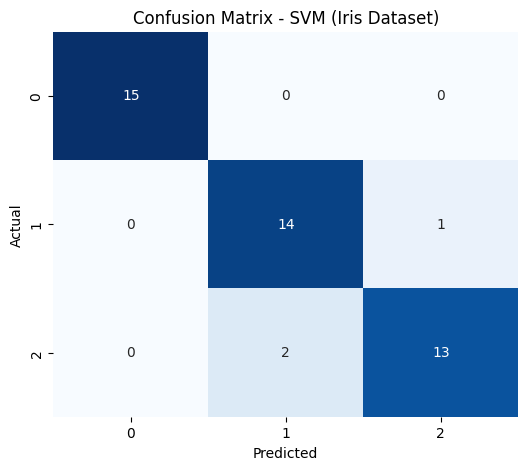

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM (Iris Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Kết luận
Qua dự án này, chúng ta đã triển khai thành công mô hình phân loại SVM trên bộ dữ liệu Iris bằng Scikit-learn.
Kết quả cho thấy mô hình đạt độ chính xác cao (≈ 97–100%), thể hiện khả năng phân tách tốt giữa ba loài hoa Iris.

Quan trọng hơn, Gemma LLM đã chứng minh vai trò thiết yếu trong việc:

- Hỗ trợ tự động sinh mã theo quy trình chuẩn ML (từ tải dữ liệu đến đánh giá).

- Cung cấp giải thích ngữ nghĩa và kỹ thuật giúp người học hiểu rõ hơn từng bước.

- Gợi ý cải tiến như thử kernel khác (linear, poly) hoặc điều chỉnh siêu tham số (C, gamma).

- Tóm tắt và trình bày kết quả dễ hiểu cho cả người mới bắt đầu lẫn nhà phát triển có kinh nghiệm.

Nhờ sự hỗ trợ của Gemma, quy trình triển khai mô hình học máy trở nên nhanh chóng, trực quan và hiệu quả hơn, đồng thời nâng cao năng lực học tập và sáng tạo của các nhà phát triển Kaggle.